# Project Data Wrangling - Gather, Assess, Clean


### Data Set - tweet archive WeRateDogs

#### This project aims to showcase three steps of data wrangling process - gather, assess and clean. The data set being used is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
#### The goal of this process is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The available basic archive does not contain additional information about tweets. This additional gathering, then assessing and cleaning is required for effective analysis of this data.

## Details of process
### There are three different sources of data mentioned in this project, that need to be combined together
### for further analysis. Each data source will be subject to the three phases - gather, assess and clean

## Gather
### Data Sources
#### 1. Enhanced Twitter Archive - Already available archive from WeRateDogs provided by Udacity.
#### 2. Image Prediction - the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This is available at Udacity Server and has to be downloaded programmatically.
#### 3. Missing or additional data for each tweet, for example retweet count and favorite ("like") count and any additional interesting data. This data is also collected programmatically using Tweepy library from Python, to call Twitter API and retrieve the data. 

## Assess
### Each datasource will be assessed visually and programmatically
### The assessment findings are listed after the assessment step in this notebook


## Clean
### Based on the visual and programmatic assessment, data will be cleaned
### The exact cleaning steps are documented in the cleaning step in this notebook

## Step 1 - Data Gathering from the above three sources

** As mentioned above, there are 3 main data files that need to be gathered:

1- The Enhanced Twitter Archive

Provided by Udacity. It contains the WeRateDogs Twitter archive which consists of basic tweet data for 5000+ tweets. Following information is available:
Tweet ID
dog name
dog rating
and dog "stage" (i.e. doggo, floofer, pupper, and puppo). However there is more information that can be gathered. For example favorite_count or retweet_count of a specific tweet, which will help to understand which dog stages are most popular

2- The Image Prediction tsv file ("Image-prediction.tsv")
The file contains image URLs and dog breed predictions based on neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and has to be downloaded programmatically using the Requests library. There are 3 important columns in this source
p1 is the algorithm's number one prediction for the image in the tweet.
p2 and p3 are the algorithm's second and third most likely predictions.
p#_conf is how confident the algorithm is in each corresponding prediction in percentage. p1_conf columns has most 99% values.
p#_dog is whether or not the # prediction is a breed of dog. (True or False)

3- Twitter API to collect additional data namely retweet_count and favourite count. 
Again this data has to be collected programmatically using Twitter API. I was able to retrieve the data using the Twitter developer account and keys, which are hidden as per instructions. The code is provided below which can be tested replacing the keys with actual ones. 
The output of this task should be a tweet_json.txt file that will hold the data for each tweet provided in Enhanced Twitter Archive. The eventual tweet_json.txt which was successfully constructed is available at the project directory. This code uses the available tweet_json.txt file for further processing, to avoid downloading data everytime from Twitter API.**

In [82]:
import tweepy
import pandas as pd

import requests
import json
import timeit
from timeit import Timer
import time
import numpy as np

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

## Data Source 1 - Enhanced Twitter Archive 

** This archive csv is already uploaded in the project directory. We need to read the csv in a dataframe.**

In [8]:
dfArchive = pd.read_csv('twitter-archive-enhanced.csv')

## Data Source2: Image Predictions File 


In [ ]:
## downloading the file from the given source url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions-requests.tsv', mode ='wb') as file:
    file.write(response.content)


## Data Source 3 - Gather additional data Via Twitter Developer API


In [ ]:
### Sample working code is below that can be run after replacing the hidden keys with actual keys. 
## For further assessment process, the one time downloaded and constructed tweet_json.txt will be used

In [6]:

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
# Store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
# Each tweet's JSON data should be written to its own line. 
# Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, 
# retweet count, and favorite count.

tweet_ids = dfArchive['tweet_id']

count = 0
fails_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
        pass

end = time.time()

print(end - start)
print(fails_dict)

## Data Gathering Process End 

## Step2: Data Assessement

## Data Source 1 - Twitter Archive 1 

### Programmatic Assessment

**we already read data from Twitter Archive csv in dfArchive. Let us examine the same**


In [98]:
dfArchive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**from the data above, the columns - source and text are superfluous since text is already extracted, and source 
is irrelevant**

In [99]:
dfArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**three columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have 181 values that are 
non-null, that means they are not original tweets, hence deletion is required also as instructed the dog stages can be combined together in a category**

In [13]:
dfArchive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**The datatype for tweet_id is integer type. Makes sense to convert it into str for consistency purposes.

**Datatypes for rating_numerator and rating_denominator should be changed to float

In [100]:
# check for duplications
dfArchive.tweet_id.duplicated().sum()

0

In [101]:
# check for null data
dfArchive.expanded_urls.isnull().sum()

59

** the dataset has no duplicates but null values **

In [102]:
# check if the name column has other entries except for dog names. This is by visual assessment
dfArchive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [32]:
# in above data, although its difficult to see what are non-dog names, however we can guess
# names like 'just', 'a' are random words 
# lets check the name columns against a general range of words and the words found in the above data

wrongNames = ['a', 'an', 'the', 'such', 'just', 'very', 'total', 'not', 'my',
              'none', 'your', 'mine', 'yours', 'this', 'all', 'his', 'quite', 'light', 'by', 'to',
             'unacceptable']

for i in wrongNames:
    
    print (len(dfArchive[dfArchive['name'] == i]))
    

55
7
8
1
4
5
0
2
1
0
0
0
0
1
1
1
4
1
1
0
1


In [104]:
# some of the words from the above list are not there in the data, so lets tidy our list
# We can use the wrongNames array in cleaning process later
wrongNames = ['a', 'an', 'the', 'such', 'just', 'very', 'not', 'my', 'this', 'all', 'his', 'quite', 'light',
             'by', 'unacceptable']

for i in wrongNames:
    
    print (len(dfArchive[dfArchive['name'] == i]))


55
7
8
1
4
5
2
1
1
1
1
4
1
1
1


** This completes assessment process for Source1 - Enhanced Twitter API**

## Source 2 - Twitter API Data

### The data for all the tweets has been written in tweet_json.txt file in the Data Gathering step
### Let's read tweet_json.txt text file, reading each line one by one as per the instructions

In [13]:
dfTweepy = pd.DataFrame()

with open ('tweet-json.txt') as file:
    for line in file:
        status = json.loads(line)
        tweet_id = status['id']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        dfTweepy = dfTweepy.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                        columns = ['tweet_id', 'retweet_count', \
                                   'favorite_count']))
dfTweepy.reset_index(drop=True)       


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [15]:
dfTweepy.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048


In [16]:
dfTweepy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


In [17]:
dfTweepy.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Data Source 3 - Image predictions file

In [18]:
dfImage = pd.read_csv('image-predictions.tsv', sep='\t')



In [19]:
# the dog names start with both upper and lower case characters.. 
dfImage.head(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
dfImage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [111]:
# check for duplicates
dfImage.tweet_id.duplicated().sum()

0

In [112]:
dfImage.jpg_url.duplicated().sum()

66

In [45]:
# a visual observation indicates that there are other names except for dogs in this table
# indicated by p1_dog as False (most likely)

dfImage[dfImage['p1_dog'] != True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [113]:
# check for missing data/entries
dfImage.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Quality Assessment Findings

### After the programmatic and visual assessment, following  issues are noted

## Quality Issues

### Data Source 1 - Enhanced Archive Data Set
#### 1. Remove unoriginal tweet entries -  there are 181 retweets that are not original
#### 2. Remove Rows with Missing Data (expanded URLs )
#### 3. Convert rating_numerator and rating_denominator data type to float 
#### 4. Convert tweet_id datatype from int to string in all datasources

### Data Source 3. Image Prediction 
#### 5. the dog names have unnecessary entries like 'a', 'the'. 
#### 6. Dog breeds have upper and lower case characters
#### 7. Remove p3 level predictions for dog breeds
#### 8. The jpg_urls column is unnecessary

## Tidyness Issues

#### 1. All dog categories are listed as separate columns. These are pupper, doggo, puppo, floofer. They need to be in one column. 
#### 2. In some columns, two dog categories are together for example pupper, doggo. This can be combined by a comma separator.
#### 3. Distributed data sources. We should combine the three different dataframes from Twitter, Enhanced Twitter Archive and Image Prediction into one consolidated csv and remove unnecessary columns


## Step 3: Data Cleaning

In [20]:
# create copies of the original dataframes for further cleaning
dfA_clean = dfArchive.copy()
dfIm_clean = dfImage.copy()
dfT_clean = dfTweepy.copy()

## 1. Remove unoriginal tweet entries

### Define
The non-null retweeted_statud_id and in_reply_to_status_id rows indicate that these are not original tweets. We can delete them as they do not help us in our analysis.


### Code

In [21]:

dfA_clean = dfA_clean[dfA_clean['retweeted_status_id'].isnull()]
dfA_clean = dfA_clean[dfA_clean['in_reply_to_status_id'].isnull()]



### Test

In [22]:
dfA_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

## 2. Remove Rows with Missing Data (expanded URLs )

### Define


Remove rows that have missing "expanded_urls'. There are still 3 entries with no expanded url specified which we can remove

### Code

In [23]:

dfA_clean.expanded_urls.dropna(inplace=True)

### Test

In [24]:
dfA_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

## 3. Convert rating_numerator and rating_denominator data type to float 

### Define

**Both rating_numerator and rating_denominator are in integer type formats. They can be converted to float.

### Code

In [25]:
dfA_clean.rating_numerator = dfA_clean.rating_numerator.astype(float)
dfA_clean.rating_denominator = dfA_clean.rating_denominator.astype(float)

### Test

In [26]:
dfA_clean.rating_numerator.dtype;
dfA_clean.rating_denominator.dtype

dtype('float64')

## 4. Convert tweet_id datatype from int to string in all datasources

### Define

The tweet id in all three data sources has integer data type. Converting it to string will ensure accuracy in comparison. Referring to the developer help from Twitter here - https://developer.twitter.com/en/docs/twitter-ids. This text indicates that we should use tweet_ids as strings instead of numeric types.

### Code

In [27]:

dfA_clean.tweet_id = dfA_clean.tweet_id.astype(str)

In [28]:
dfT_clean.tweet_id = dfT_clean.tweet_id.astype(str)

In [29]:
dfIm_clean.tweet_id = dfIm_clean.tweet_id.astype(str)

### Test

In [30]:
dfT_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [124]:
print(dfA_clean.tweet_id.dtype);
print(dfT_clean.tweet_id.dtype);
print(dfIm_clean.tweet_id.dtype);


object
object
object


## 5. Remove dog names having values like 'a', 'the' etc

### Define

Visual observation shows that dog names have seveal invalid entries like 'a', 'the'. These can be removed. First we find how many such entries are there from a set of possible values and then remove those entries.

### Code

In [33]:
# remove dog names having values like 'a', 'an', 'the' etc from first data source
dfA_clean_names = dfA_clean.copy()
# use the already created array wrongNames from Data Assessment step
for i in wrongNames:
    dfA_clean_names.drop(dfA_clean_names[dfA_clean_names['name'] == i].index, inplace = True)


### Test

In [34]:
dfA_clean_names.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

## 6. Dog breeds have upper and lower case characters

### Define

The dog breeds have mixed characters - some start in upper case and some don't. It will help to convert all breeds in lower case for comparision and analsys purposes. 

### Code

In [35]:
# convert all dog names to lower case

dfIm_clean.p1 = dfIm_clean.p1.str.lower()
dfIm_clean.p2 = dfIm_clean.p2.str.lower()
dfIm_clean.p3 = dfIm_clean.p3.str.lower()

### Test

In [36]:
dfIm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [37]:
dfIm_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## 7. Remove p3 level predictions for dog breeds

### Define

p1 and p2 level predictions are noteworthy for analysis. p3, p3_conf do not provide accuracy and we can remove tehm.

### Test

In [38]:
# drop the columns p3, p3_conf and p3_dog.. from visual inspection, only p1 and p2 seem noteworthy for analysis
dfIm_clean.drop(columns=['p3', 'p3_conf', 'p3_dog'], inplace = True)


In [39]:
# remove non-dog entries indicated by p1_dog
dfIm_clean = dfIm_clean.loc[dfIm_clean.p1_dog, :]

### Test

In [40]:

dfIm_clean[dfIm_clean['p1_dog'] != True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog


## 8. The jpg_urls in image prediction datasource is unnecessary

### Define

**Although the jpg_url could be an important data point to go to the tweet pages, for this analysis, it is an unnecessary datapoint
that does is not used in analysis. Hence it can be removed

### Code

In [41]:

dfIm_clean.drop(columns=['jpg_url'], inplace = True)


### Test

In [42]:
dfIm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   object 
 1   img_num   1532 non-null   int64  
 2   p1        1532 non-null   object 
 3   p1_conf   1532 non-null   float64
 4   p1_dog    1532 non-null   bool   
 5   p2        1532 non-null   object 
 6   p2_conf   1532 non-null   float64
 7   p2_dog    1532 non-null   bool   
dtypes: bool(2), float64(2), int64(1), object(3)
memory usage: 86.8+ KB


# Tidyness issue 

## 1. combine dog stages into one column

### Define

The dog stages are distributed across four columns, but they are indeed only one variable/category. We will combine the four dog stages into one column for correct analysis.


### Code

In [43]:

dfA_final = dfA_clean_names.copy()

In [44]:
dfA_final.doggo.replace('None', '', inplace=True)
dfA_final.floofer.replace('None', '', inplace=True)
dfA_final.pupper.replace('None', '', inplace=True)
dfA_final.puppo.replace('None', '', inplace=True)


dfA_final['stage'] = dfA_final.doggo + dfA_final.floofer + dfA_final.pupper + dfA_final.puppo




### Test

In [45]:
dfA_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2008 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2008 non-null   object 
 4   source                      2008 non-null   object 
 5   text                        2008 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2005 non-null   object 
 10  rating_numerator            2008 non-null   float64
 11  rating_denominator          2008 non-null   float64
 12  name                        2008 non-null   object 
 13  doggo                       2008 

## 2. Add separator between two combined dog stages

### Define

Some dog stages have two entries like doggopupper or doggopuppo. We can add a separator for better readability

## Code

In [46]:
dfA_final.stage.value_counts()

                1682
pupper           213
doggo             71
puppo             23
floofer            9
doggopupper        8
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [47]:
# add separator between the two dog stages, if there are any
dfA_final.loc[dfA_final.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
dfA_final.loc[dfA_final.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
dfA_final.loc[dfA_final.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


In [48]:
# drop unneeded columns from the dataframe
dfA_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [49]:
dfA_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2008 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2008 non-null   object 
 4   source                      2008 non-null   object 
 5   text                        2008 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2005 non-null   object 
 10  rating_numerator            2008 non-null   float64
 11  rating_denominator          2008 non-null   float64
 12  name                        2008 non-null   object 
 13  stage                       2008 

In [50]:
dfA_final.stage.value_counts()

                 1682
pupper            213
doggo              71
puppo              23
floofer             9
doggo,pupper        8
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

## 3. Replace blank or empty enries with NaN 

### Define

There are many blank entries in stage column after combiniting the stages together. We can replace them with NaN.

### Code

In [51]:
dfA_final.stage.isnull().any()

False

In [53]:
dfA_final.stage.isnull().any()

False

In [54]:
# how many blank entries we have for stage column
dfA_final[dfA_final['stage'] == '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6.0,10.0,None,
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10.0,10.0,None,
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9.0,10.0,None,
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,


In [55]:
dfA_final[dfA_final['stage'] != '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9.0,10.0,Scott,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12.0,10.0,Jazz,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11.0,10.0,Rolf,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9.0,10.0,Opal,pupper


In [56]:
# replace blank entries with NaN
dfA_final.loc[dfA_final.stage == '', 'stage'] = np.nan

### Test

In [57]:
dfA_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2008 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2008 non-null   object 
 4   source                      2008 non-null   object 
 5   text                        2008 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2005 non-null   object 
 10  rating_numerator            2008 non-null   float64
 11  rating_denominator          2008 non-null   float64
 12  name                        2008 non-null   object 
 13  stage                       326 n

## 4. Merge dataframes into one and replace unnecessary columns

### Define

We can now merge the three cleaned up datasources for a combined master. We will merge it based on tweet_id and then remove 
unnecessar columns from the master

### Code

In [58]:

dfA_final_trim = dfA_final.copy()

In [59]:
dfA_final_trim.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text'], axis=1, inplace=True)

In [60]:
dfA_final_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2008 non-null   object 
 1   timestamp                   2008 non-null   object 
 2   retweeted_status_id         0 non-null      float64
 3   retweeted_status_user_id    0 non-null      float64
 4   retweeted_status_timestamp  0 non-null      object 
 5   expanded_urls               2005 non-null   object 
 6   rating_numerator            2008 non-null   float64
 7   rating_denominator          2008 non-null   float64
 8   name                        2008 non-null   object 
 9   stage                       326 non-null    object 
dtypes: float64(4), object(6)
memory usage: 172.6+ KB


**merging the three sources based on tweet_id**

In [61]:
df_temp = pd.merge(dfA_final_trim, dfT_clean, how='inner', on='tweet_id')

In [62]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2008 non-null   object 
 1   timestamp                   2008 non-null   object 
 2   retweeted_status_id         0 non-null      float64
 3   retweeted_status_user_id    0 non-null      float64
 4   retweeted_status_timestamp  0 non-null      object 
 5   expanded_urls               2005 non-null   object 
 6   rating_numerator            2008 non-null   float64
 7   rating_denominator          2008 non-null   float64
 8   name                        2008 non-null   object 
 9   stage                       326 non-null    object 
 10  retweet_count               2008 non-null   int64  
 11  favorite_count              2008 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 203.9+ KB


In [63]:
df_t = dfA_final_trim.merge(dfT_clean,on='tweet_id').merge(dfIm_clean,on='tweet_id')

### Test

In [64]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1402 non-null   object 
 1   timestamp                   1402 non-null   object 
 2   retweeted_status_id         0 non-null      float64
 3   retweeted_status_user_id    0 non-null      float64
 4   retweeted_status_timestamp  0 non-null      object 
 5   expanded_urls               1402 non-null   object 
 6   rating_numerator            1402 non-null   float64
 7   rating_denominator          1402 non-null   float64
 8   name                        1402 non-null   object 
 9   stage                       219 non-null    object 
 10  retweet_count               1402 non-null   int64  
 11  favorite_count              1402 non-null   int64  
 12  img_num                     1402 non-null   int64  
 13  p1                          1402 

In [65]:
df_t.to_csv('twitter_archive_master.csv')

## This completed the data cleaning and merging process.
#### We have a combined twitter_archive_master.csv that will be used for analysis in below cells

## Analysis and Visualization
#### The dataset that we have now contains not only the most popular dog breeds found in Twitter Archive WeRateDogs, but also additional info like retweet_count, favourite_count, their specific categorie like puppo or doggo, but also their image predictions. 
#### The analysis and visualization process here aims to explore dataset to understand following factors - 
##### 1. What are the most favourite dog breeds?
##### 2. Which dog stages are most common or popular?
#### 3. Which dog breed was most commonly predicted?

In [66]:
df_wrd = pd.read_csv('twitter_archive_master.csv', index_col=[0])

In [67]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1402 non-null   int64  
 1   timestamp                   1402 non-null   object 
 2   retweeted_status_id         0 non-null      float64
 3   retweeted_status_user_id    0 non-null      float64
 4   retweeted_status_timestamp  0 non-null      float64
 5   expanded_urls               1402 non-null   object 
 6   rating_numerator            1402 non-null   float64
 7   rating_denominator          1402 non-null   float64
 8   name                        1402 non-null   object 
 9   stage                       219 non-null    object 
 10  retweet_count               1402 non-null   int64  
 11  favorite_count              1402 non-null   int64  
 12  img_num                     1402 non-null   int64  
 13  p1                          1402 

In [68]:
df_wrd.head(5)

,tweet_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog
0,892177421306343426,2017-08-01 00:17:27 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,1,chihuahua,0.323581,True,pekinese,0.090647,True
1,891815181378084864,2017-07-31 00:18:03 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,1,chihuahua,0.716012,True,malamute,0.078253,True
2,891327558926688256,2017-07-29 16:00:24 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,2,basset,0.555712,True,english_springer,0.225770,True
3,891087950875897856,2017-07-29 00:08:17 +0000,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,3261,20562,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True
4,890971913173991426,2017-07-28 16:27:12 +0000,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2158,12041,1,appenzeller,0.341703,True,border_collie,0.199287,True


#### Insight1 : What are the most favourite dog breeds?

In [70]:
df_large = df_wrd.nlargest(5, ['favorite_count'])
df_large[['p1', 'stage', 'favorite_count', 'retweet_count']]


,p1,stage,favorite_count,retweet_count
245,lakeland_terrier,puppo,132810,48265
604,labrador_retriever,doggo,131075,79515
50,english_springer,NaN,107956,45849
322,chihuahua,NaN,107015,56625
94,french_bulldog,pupper,106827,32883


In [72]:
df_fav = df_wrd[['p1', 'favorite_count']].sort_values(by=['favorite_count'], ascending=False).head(5)

df_fav


,p1,favorite_count
245,lakeland_terrier,132810
604,labrador_retriever,131075
50,english_springer,107956
322,chihuahua,107015
94,french_bulldog,106827


<AxesSubplot:title={'center':'Top 5 dog breeds based on favourite count'}, xlabel='Breed', ylabel='Count'>

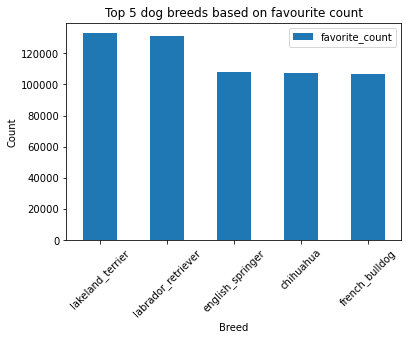

In [73]:
df_fav.plot.bar(x='p1', y='favorite_count', title="Top 5 dog breeds based on favourite count", xlabel = 'Breed', ylabel = 'Count', rot=45)


#### - As clear from above tables and the graph above, the top 5 dog breeds which are most favorites are lakeland_terrier, labrador_retriever, english_springer, chihuahua and french_bulldog . 

#### Insight1 - What is the most favourite dog breed based on correct predition and favourite count?

####   The p1_dog columns tells us if the prediction actually a dog or not. Let us see which is the popular dog breed based on averaged favourite count and given that the prediction was actually a dog

In [74]:
df_av = df_wrd.query('p1_dog == True').groupby(['p1'])['favorite_count'].mean().sort_values(ascending = False)
df_av

p1
black-and-tan_coonhound    33911.000000
saluki                     24060.000000
french_bulldog             17913.000000
english_springer           17527.750000
afghan_hound               17326.666667
                               ...     
groenendael                 1896.000000
tibetan_terrier             1841.000000
japanese_spaniel            1362.000000
ibizan_hound                1114.666667
brabancon_griffon            885.000000
Name: favorite_count, Length: 111, dtype: float64

#### Insight2 - From the above table, black-and-tan_coonhound and saluki seem to be the two most favorite dog breeds


#### Insight3: Which dog stages are most common or popular?


In [75]:
df_wrd.stage.value_counts()

pupper           137
doggo             48
puppo             19
floofer            7
doggo,pupper       6
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

<AxesSubplot:title={'center':'Most popular dog stages'}, xlabel='Stage', ylabel='Count'>

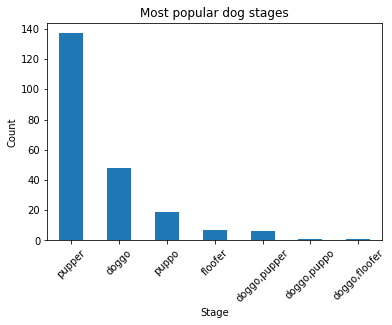

In [76]:
df_wrd.stage.value_counts().plot.bar(title="Most popular dog stages", xlabel = 'Stage', ylabel = 'Count', rot=45)

#### Insight3 - As we can see from the above table and graph, pupper is the most popular dog stage followed by doggo**

#### Insight3  - What are the average ratings of pupper and doggo?

In [77]:
# pupper's mean ratings, retweets and favourite count
df_wrd[df_wrd['stage'] == 'pupper'].describe()


,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf
count,1.370000e+02,0.0,0.0,0.0,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,137.000000
mean,7.232593e+17,NaN,NaN,NaN,11.058394,10.0,2525.627737,7955.036496,1.299270,0.672407,0.130057
std,6.032762e+16,NaN,NaN,NaN,1.927992,0.0,3814.580748,11828.337924,0.700472,0.238733,0.102510
min,6.721600e+17,NaN,NaN,NaN,7.000000,10.0,103.000000,693.000000,1.000000,0.100499,0.000068
25%,6.801460e+17,NaN,NaN,NaN,10.000000,10.0,761.000000,2629.000000,1.000000,0.471276,0.043389
50%,6.936300e+17,NaN,NaN,NaN,11.000000,10.0,1219.000000,3419.000000,1.000000,0.738277,0.106227
75%,7.500717e+17,NaN,NaN,NaN,12.000000,10.0,3065.000000,8092.000000,1.000000,0.873233,0.197486
max,8.863661e+17,NaN,NaN,NaN,27.000000,10.0,32883.000000,106827.000000,4.000000,0.999828,0.442016


In [78]:
# doggo's mean ratings, retweets and favourite count
df_wrd[df_wrd['stage'] == 'doggo'].describe()


,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf
count,4.800000e+01,0.0,0.0,0.0,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000
mean,8.038936e+17,NaN,NaN,NaN,12.020833,10.0,7594.854167,20556.354167,1.291667,0.569301,0.176014
std,4.598214e+16,NaN,NaN,NaN,1.391304,0.0,14428.397022,24534.261232,0.617419,0.245200,0.119625
min,7.160809e+17,NaN,NaN,NaN,8.000000,10.0,725.000000,2593.000000,1.000000,0.113992,0.000046
25%,7.603776e+17,NaN,NaN,NaN,11.000000,10.0,2001.500000,8281.500000,1.000000,0.424103,0.088372
50%,8.164576e+17,NaN,NaN,NaN,12.000000,10.0,2900.500000,12282.500000,1.000000,0.565964,0.154895
75%,8.314770e+17,NaN,NaN,NaN,13.000000,10.0,5207.000000,20740.250000,1.000000,0.746571,0.266374
max,8.902403e+17,NaN,NaN,NaN,14.000000,10.0,79515.000000,131075.000000,4.000000,0.999715,0.451038


#### From the above two tables, we can see that pupper has average mean average rating as 11 and doggo has 10. There is only a slight difference between the two

#### Insight4 - What dog stages have most favorite count?

In [79]:
dfFav = df_wrd.groupby(['stage']).favorite_count.mean().sort_values(ascending = False)
dfFav

stage
doggo,puppo      47844.000000
puppo            22308.210526
doggo            20556.354167
doggo,floofer    17169.000000
doggo,pupper     14447.000000
floofer          13206.000000
pupper            7955.036496
Name: favorite_count, dtype: float64

<AxesSubplot:title={'center':'Favourite Dog Stages - Mean count'}, ylabel='favorite_count'>

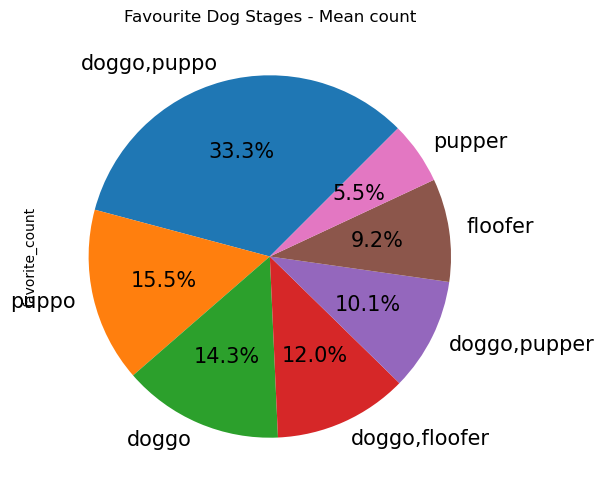

In [80]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
dfFav.plot(kind='pie', ax=ax, title="Favourite Dog Stages - Mean count", legend=False, autopct='%1.1f%%', startangle= 45, fontsize=15)

#### Insight4 - As clear from above table and pie chart, most favoured dog stage based on mean favourite count is doggo, pupper followed by puppo and doggo

#### Insight5: What are the most retweeted dog stages?

In [81]:
dfRet = df_wrd.groupby(['stage']).retweet_count.mean()
dfRet

stage
doggo             7594.854167
doggo,floofer     3433.000000
doggo,pupper      4849.500000
doggo,puppo      19196.000000
floofer           4968.714286
pupper            2525.627737
puppo             6551.473684
Name: retweet_count, dtype: float64

<AxesSubplot:title={'center':'Retweeted Dog Stages'}, ylabel='retweet_count'>

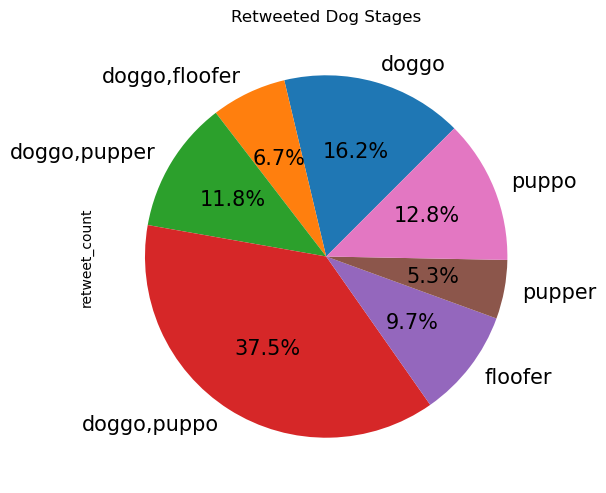

In [18]:

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

dfRet.plot(kind='pie', ax=ax, title="Retweeted Dog Stages", legend=False, autopct='%1.1f%%', startangle= 45, fontsize=15)

#### From the above table and graph, its clear that doggo, pupper have highest retweet count.